enter the number of variables: 20
Enter the initial population size: 10
Enter the minimum value of X: -5.12
Enter the maximum value of X: 5.12
Enter the max number of iterations: 300
[247.81335448 247.81335448 247.81335448 247.81335448 247.81335448
 233.5467587  233.11631302 233.11631302 225.28173146 225.15321366
 217.96407369 218.65080531 218.31308184 218.20409969 217.6188458
 217.6188458  209.46034803 205.97479023 205.97479023 204.99608939
 204.99608939 201.51016132 201.51016132 201.3901328  194.31772604
 194.29716007 185.89354982 185.76372963 185.71450758 183.25954696
 178.39074092 169.6548121  169.06907781 166.05752316 166.04094518
 165.73154414 165.41581049 156.03459571 155.93376105 155.91162593
 155.91162593 148.93510774 146.31897133 146.31897133 146.31897133
 145.96761951 138.50798162 133.31642119 131.63312861 131.63312861
 131.23623187 131.23623187 131.23623187 131.23567937 131.23567937
 131.23567937 131.23567937 131.23561949 131.23545723 131.23545563
 131.23545563 131.2354334 

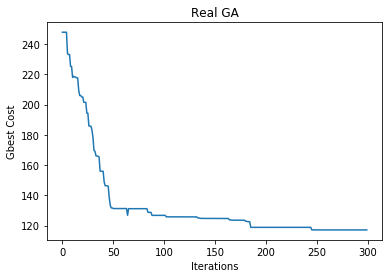

In [3]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
v=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(v,N,xmin,xmax):
    return ((np.random.rand(N,v))*(2*xmax))-xmax
pop=POP(v,N,xmin,xmax)
#fitness
def fitness(a):
    l=0
    for value in a:
        o=((value**2)-(10*np.cos(2*np.pi*value))+10)
        l+=o
    return l
def findfitness(pop):
    return np.apply_along_axis(fitness,1,pop)
bests=np.empty((iterations,v))
for iteration in range(0,iterations):
        fit=findfitness(pop)
        #Tournament Selection
        parent=np.empty((N,v))
        for s in range(0,N):
            r1=np.random.randint(0,N)
            r2=r1
            while r2==r1:
                r2=np.random.randint(0,N)
            if fit[r1]<fit[r2]:
                parent[s]=pop[r1]
            else:
                parent[s]=pop[r2]
        #crossover
        Pc=0.8
        Uc=20
        child=np.empty((int((Pc*N)),v))
        for c in range(0,int(Pc*N),2):
            for f in range(0,v):
                r=np.random.rand()
                if r<=0.5:
                    b=(2*r)**(1/(1+Uc))
                else:
                    b=1/((2*(1-r))**(1/(1+Uc)))
                child[c,f]= ((1+b)*parent[c,f]+(1-b)*parent[c+1,f])/2
                child[c+1,f] =((1-b)*parent[c,f]+(1+b)*parent[c+1,f])/2
        #Mutation
        mpop=np.concatenate((pop, child), axis=0)
        Pm=0.2
        Um=20
        for i in range(0,int(Pm*mpop.shape[0])):
            r3=np.random.randint(0,mpop.shape[0])
            for m in range(0,v):
                r4=np.random.rand()
                if r4<=0.5:
                    d=((2*r4)**(1/(1+Um)))-1
                else:
                    d=1-((2*(1-r4))**(1/(1+Um)))
                mpop[r3,m]+=d
        fitness_b=findfitness(mpop)
        sortindex=np.argsort(fitness_b,axis=0)
        mpop=mpop[sortindex,:].reshape(int(N+(Pc*N)),v)
        newgen=mpop[0:N,:]
        fitness_a=findfitness(newgen)
        bests[iteration]=newgen[0]        
        pop=newgen
bestcost=findfitness(bests)
print(bestcost)
plt.plot(bestcost)
plt.xlabel('Iterations')
plt.ylabel('Gbest Cost')
plt.title('Real GA')
plt.show()